<a href="https://colab.research.google.com/github/jorgenriquez/Redes-Neuronales-con-Python/blob/main/Perceptron_Clase_03_Redes_Neuronales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

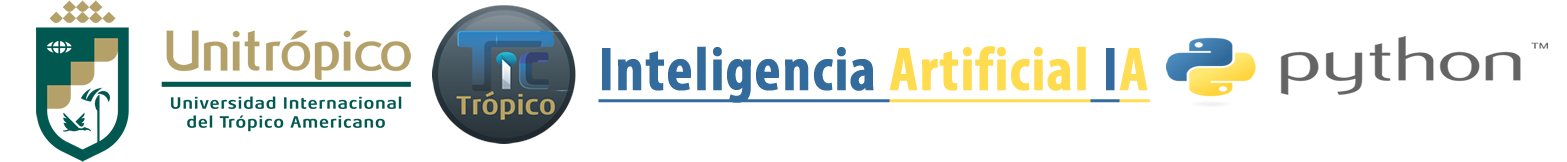

# **Introducción a Redes Neuronales con Python**

### **Objetivo Final:**
Al finalizar este curso, tendrás las habilidades necesarias para construir, entrenar y evaluar modelos de redes neuronales con Python. ¡Prepárate para sumergirte en el fascinante mundo de la inteligencia artificial!

### **Descripción:**

Este curso proporcionará los fundamentos esenciales para comprender y trabajar con redes neuronales utilizando el lenguaje de programación Python. Desde conceptos básicos hasta implementaciones prácticas, exploraremos cómo las redes neuronales pueden resolver problemas complejos y realizar tareas inteligentes. A lo largo del curso, utilizaremos las bibliotecas más populares, como TensorFlow y Keras, para crear y entrenar modelos de redes neuronales.

## **Contenido del Curso:**

**Introducción a Redes Neuronales:**

Conceptos básicos de neuronas y conexiones.
Arquitecturas y topologías comunes.
Preparación de Datos:

**Normalización y preprocesamiento de datos.**
Manejo de conjuntos de entrenamiento y prueba.
Construcción de Modelos:

**Implementación de modelos de red neuronal.**
Selección de funciones de activación y capas.
Entrenamiento de Modelos:

**Definición de funciones de pérdida.**
Optimización y ajuste de hiperparámetros.
Evaluación de Modelos:

**Validación cruzada y métricas de rendimiento.**
Interpretación de resultados y ajustes finales.
Requisitos:

**Conocimientos básicos de Python.**
Familiaridad con conceptos matemáticos básicos.
Recursos Adicionales:

Ayudas
Enlaces a bibliografía relevante.
Libros
Ejemplos de código y proyectos prácticos.


## **Neurona de McCulloch y Pitts**

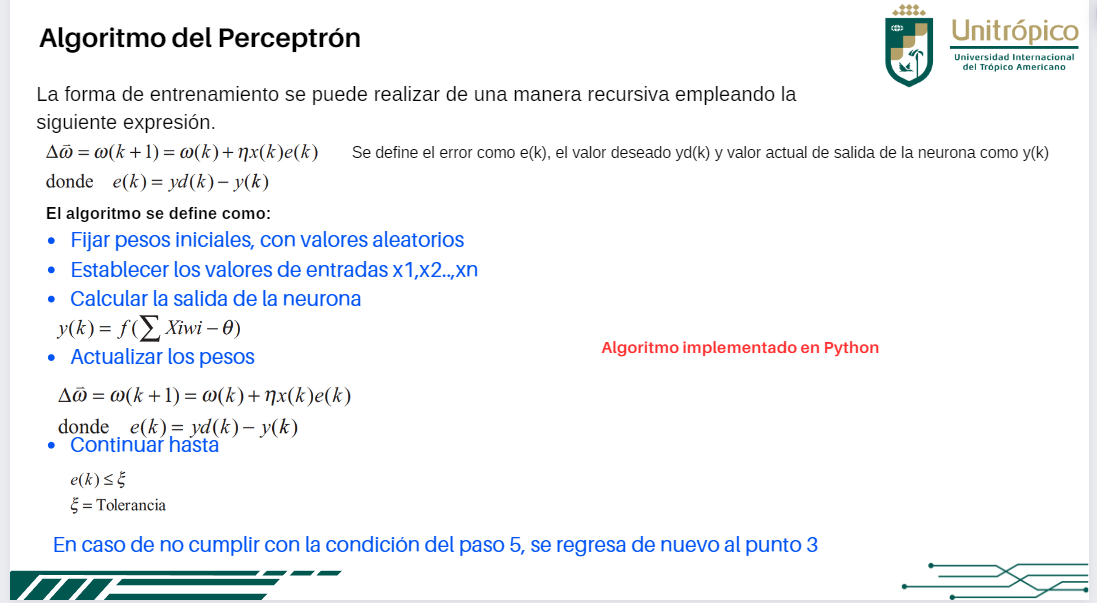


## **Implementación básica de un perceptrón con dos entradas y una salida**

Este código implementa un perceptrón simple con dos entradas y una salida, que aprende a clasificar patrones binarios mediante el algoritmo de aprendizaje del perceptrón.

Perceptron. Toma tres argumentos: **input_size, learning_rate y epochs**.


*   **input_size** representa la dimensión de los datos de entrada.
*   **learning_rate **es la tasa de aprendizaje, que controla qué tan rápido el perceptrón ajusta sus pesos durante el entrenamiento.

*   **epochs** representa el número de veces que el perceptrón iterará sobre el conjunto de datos de entrenamiento durante el proceso de entrenamiento.


**Método activation_function:** Este método implementa la función de activación del perceptrón. En este caso, se utiliza la función de activación escalón unitario (también conocida como función escalón de Heaviside), que devuelve 1 si la entrada es mayor o igual a cero, y 0 en otro caso.



In [ ]:
# Programación de una neurona (perceptron)
import numpy as np
import pandas as pd

# input_size representa el número de entradas del perceptrón
# learning_rate es la tasa de aprendizaje
# epochs es el número de iteraciones de entrenamiento.

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100): #
        self.weights = np.random.rand(input_size + 1)  # Se inicializan los pesos del perceptrón de manera aleatoria  +1 para el sesgo
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]  # suma ponderada más el sesgo
        return self.activation_function(summation)

    def train(self, training_inputs, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error

## **Primeras aplicaciones del modelo de McCulloch y Pitts**

Puerta lógica **AND**
Una de las primeras aplicaciones del modelo es resolver algunas puertas lógicas, como **AND** o OR. Por ejemplo la tabla de la verdad de la puerta AND es:

In [ ]:
# Compuerta AND
cols = ['x1', 'x2', 'AND']
puerta_and=[[0,0,0], [0,1,0], [1,0,0], [1,1,1]]
df = pd.DataFrame(puerta_and, columns=cols)
df.head()

,x1,x2,AND
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [ ]:
# Compuerta OR
cols = ['x1', 'x2', 'OR']
puerta_and=[[0,0,0], [0,1,1], [1,0,1], [1,1,1]]
df = pd.DataFrame(puerta_and, columns=cols)
df.head()

,x1,x2,OR
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [ ]:
# Compuerta NOT
cols = ['x1',  'NOT']
puerta_not=[[0,1], [1,0]]
df = pd.DataFrame(puerta_not, columns=cols)
df.head()

,x1,NOT
0,0,1
1,1,0


In [ ]:
# Compuerta NOT
# Datos de entrenamiento
training_inputs_not = np.array([[0, 1], [1,0]])
training_inputs_not

array([[0, 1],
       [1, 0]])

In [ ]:
# Datos de entrenamiento
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

In [ ]:
training_inputs

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [ ]:
type(training_inputs)

numpy.ndarray

In [ ]:
labels_AND = np.array([0, 0, 0, 1]) # Compuerta AND
labels_AND

array([0, 0, 0, 1])

In [ ]:
# Crear y entrenar el perceptrón para la compuerta AND
perceptron = Perceptron(input_size=2)
perceptron.train(training_inputs, labels_AND )

# Hacer predicciones
inputs = np.array([0, 1])
print("Predicción para [0, 1]:", perceptron.predict(inputs))

Predicción para [0, 1]: 0


In [ ]:
# Crear y entrenar el perceptrón para la compuerta OR
labels_OR = np.array([0, 1, 1, 1]) # Compuerta AND

perceptron = Perceptron(input_size=2)
perceptron.train(training_inputs, labels_OR)

# Hacer predicciones
inputs = np.array([0, 1])
print("Predicción para [0, 1]:", perceptron.predict(inputs))

Predicción para [0, 1]: 1


In [ ]:
cols = ['x1', 'x2', 'AND']
puerta_and=[[0,0,0], [0,1,0], [1,0,0], [1,1,1]]
df = pd.DataFrame(puerta_and, columns=cols)
df.head()

,x1,x2,AND
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


# **Funciones de activacion - Redes Neuronales**

In [ ]:
import numpy as np
import math, random
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Math, Latex
import tensorflow as tf

## **Función Sigmoide**
La razón principal por la que usamos la función sigmoide es porque existe entre (0 a 1). Por lo tanto, se usa especialmente para modelos en los que tenemos que predecir la probabilidad como un resultado. Dado que la probabilidad de cualquier cosa existe solo entre el rango de 0 y 1

In [ ]:
#Creamos la función sigmoide con lambda , donde lambda[0] es la sigmoide y lambda[1] es su derivada
sigm = (lambda x:1/(1+np.e**(-x)),lambda x:x * (1-x))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

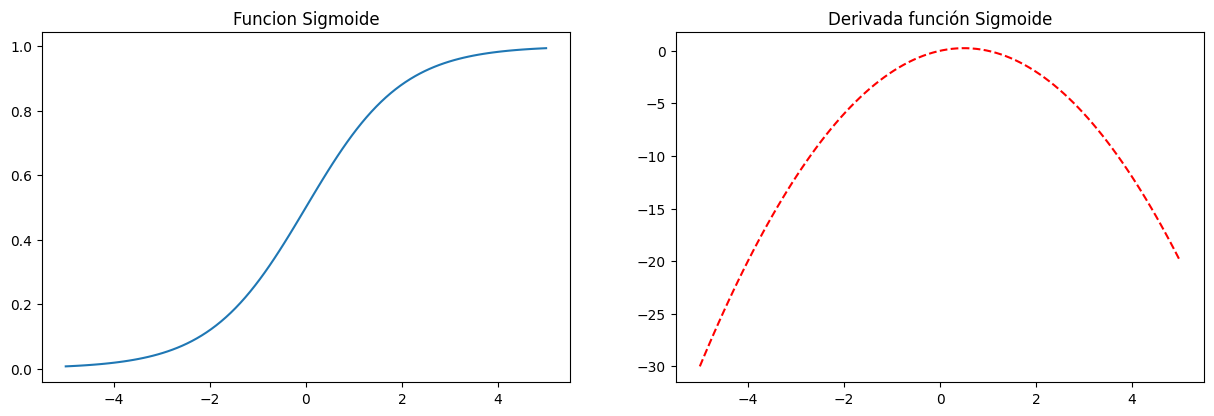

In [ ]:
#Latex
display(Math(r'sigmoide(x) = \frac{1}{1+e^{-x}} '))
display(Math(r"$$sigmoide'(x) = x{(1-x)}"))

v = np.linspace(-5,5,100)
plt.figure(1,figsize=(15,10))
plt.subplot(221)
plt.plot(v,sigm[0](v))
plt.title("Funcion Sigmoide")
plt.subplot(222)
plt.plot(v,sigm[1](v), "--", color="red")
plt.title("Derivada función Sigmoide")
plt.show()

## **Función Tangente hiperbólica o Gaussiana**
Es una función similar a la Sigmoide pero produce salidas en escala de [-1, +1]. Además, es una función continua. En otras palabras, la función produce resultados para cada valor de x.

In [ ]:
#Tangente Hiperbólica y su derivada
cosh = (lambda x: (np.e**(x) + np.e**(-x))/2) #Saco la función de coseno hiperbólico para la derivada de la tangh\n",
tanh = (lambda x: (np.e**(x) - np.e**(-x))/(np.e**(x) + np.e**(-x)), lambda x: 1/cosh(x)**2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

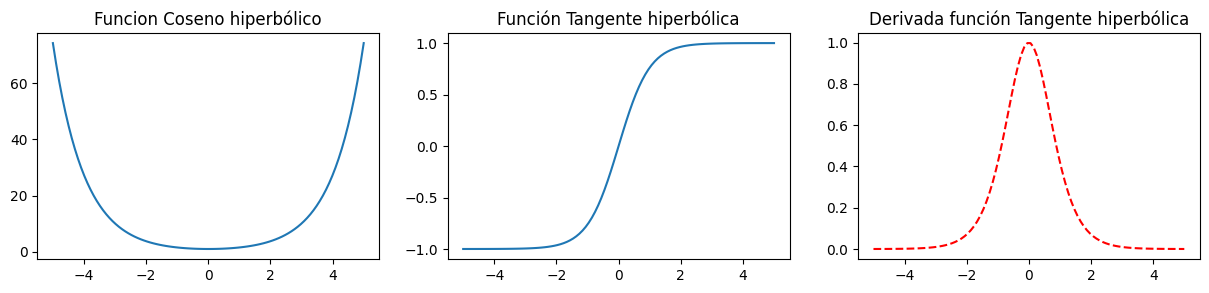

In [ ]:
#Latex
display(Math(r'cosh(x) = \frac{e^{-x} + e^{-x}}{2}'))
display(Math(r'tanh(x) = \frac{e^{-x} - e^{-x}}{e^{-x} + e^{-x}} '))
display(Math(r"'tanh(x) = \frac{1}{\cosh^2{x}} "))

v = np.linspace(-5,5,100)
plt.figure(1,figsize=(15,10))
plt.subplot(331)
plt.plot(v,cosh(v))
plt.title("Funcion Coseno hiperbólico")
plt.subplot(332)
plt.plot(v,tanh[0](v))
plt.title("Función Tangente hiperbólica")
plt.subplot(333)
plt.plot(v,tanh[1](v), "--", color="red")
plt.title("Derivada función Tangente hiperbólica")
plt.savefig('images\sigmoide.png')
plt.show()

## **Función RELU (Rectified Lineal Unit)**
ReLU es la función de activación más utilizada en el mundo en este momento. Desde entonces, se utiliza en casi todas las redes neuronales convolucionales o el aprendizaje profundo. Como puedes ver, ReLU está medio rectificado (desde abajo). f(z) es cero cuando z es menor que cero y f(z) es igual a z cuando z es superior o igual a cero. Es una función usada en las capas ocultas de nuestra red neuronal, NO en las de salida

In [ ]:
#Relu Rectified Lineal Unit
relu = (lambda x: np.maximum(0,x), lambda x: 1. * (x > 0))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

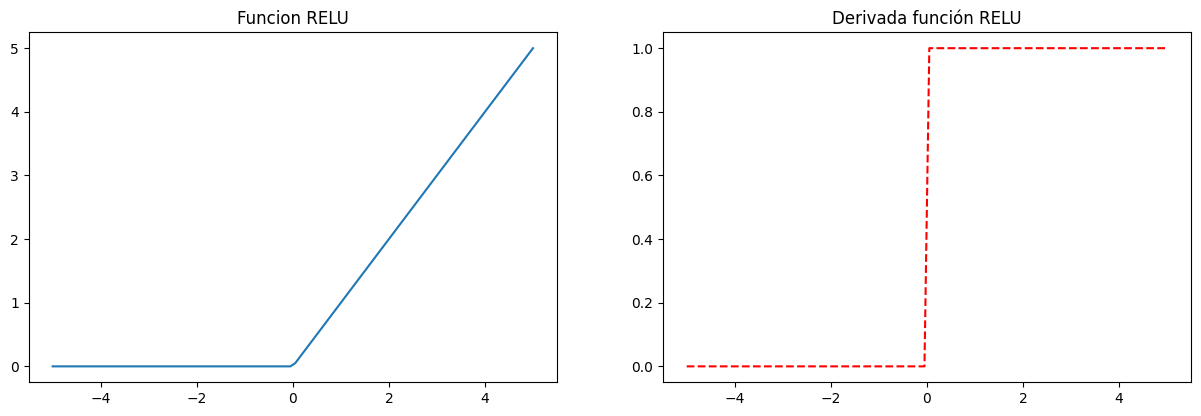

In [ ]:
#Latex
display(Math(r'relu(x) = \max(0,x) '))
display(Math(r"'relu(x) = 1.(x>0) "))

v = np.linspace(-5,5,100)
plt.figure(1,figsize=(15,10))
plt.subplot(221)
plt.plot(v,relu[0](v))
plt.title("Funcion RELU")
plt.subplot(222)
plt.plot(v,relu[1](v), "--", color="red")
plt.title("Derivada función RELU")
plt.savefig('images\sigmoide.png')
plt.show()

## **Softmax**
Es la forma más generalizada de la función de activación sigmoide. Se utiliza en problemas de clasificación de múltiples clases. Similar a la sigmoide, los elementos del vector de salida están en el rango 0-1, la diferencia es que su suma es igual a 1. Se utiliza como capa final en los modelos de clasificación.

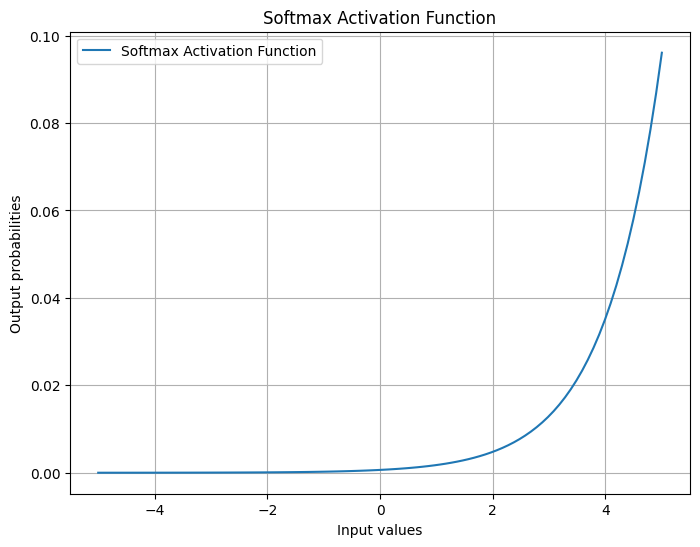

In [ ]:
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Mejora la estabilidad numérica
    return exp_x / exp_x.sum(axis=0)

# Generar datos para graficar
x = np.linspace(-5, 5, 100)
y = softmax(x)

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Softmax Activation Function')
plt.title('Softmax Activation Function')
plt.xlabel('Input values')
plt.ylabel('Output probabilities')
plt.legend()
plt.grid(True)
plt.show()

# **Funciones de coste y sus derivadas**
### **MSE (Error cuadratico medio)**

In [ ]:
import numpy as np
import math, random
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Math, Latex

In [ ]:
mse_loss= (lambda Yp,Yr: np.mean((Yp-Yr)**2), lambda Yp,Yr: (Yp-Yr))

display(Math(r'MSE = \frac{1}{n}{\sum_{1=1}^n{(Y_i - \hat{Y_i})}^2} '))
display(Math(r"'MSE = \sum_{i=1}^n{(Y_i - \hat{Y_i})} "))

<IPython.core.display.Math object>

<IPython.core.display.Math object>